# Kaggle - Olympic Project
### Laura Le

#### Resources:
* https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results#athlete_events.csv
* https://noc-region.s3.amazonaws.com/regions.csv 

### Describe the dataset & dataset source
* The dataset is from Kaggle.
* It is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. It also contains athletes' basic bio data such as age, sex, height, weight, and performance record (medal).
* This Olympic data is the result of an incredible amount of research by a group of Olympic history enthusiasts and self-proclaimed 'statistorians'. 
* The data set contains 2 files: athlete_event and noc_regions. There are 15 cloumns in file athlete_event and 3 columns in noc_regions.
* To remove issues from wrong data types, missing values and redundant values, the data was wrangled in the new data file 'region.csv': https://noc-region.s3.amazonaws.com/regions.csv

### Motivation to explore this dataset
Olympic games are leading international sporting events, they represent the highest level of worldwide competition. This dataset provides an opportunity to discover how the Olympics have evolved over time, the difference between the participation, performance of women and men, the patterns in performance of different nations,different sports.

#### With the information from the Olympic dataset, I'll create some transactional database tables using PostgreSQL.But first I need to connect to the database:

The ipython-sql library is loaded using the %load_ext iPython extension syntax and is pointed to the connection object 

In [1]:
%load_ext sql

Drop database in case it is already created. 

In [2]:
!dropdb -U student project_olympic

Create a new database for user student and name it project_olympic

In [3]:
!createdb -U student project_olympic

Connect to the database. 

In [4]:
%sql postgresql://student@/project_olympic

'Connected: student@project_olympic'

#### Dimentional Tables

#### 1. Upload a Wrangled Datasets

Upload the Athletes dataset 


In [5]:
!wget https://noc-region.s3.amazonaws.com/athletes.csv

--2020-02-17 18:56:56--  https://noc-region.s3.amazonaws.com/athletes.csv
Resolving noc-region.s3.amazonaws.com (noc-region.s3.amazonaws.com)... 52.216.176.27
Connecting to noc-region.s3.amazonaws.com (noc-region.s3.amazonaws.com)|52.216.176.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39453272 (38M) [text/csv]
Saving to: ‘athletes.csv’

athletes.csv        100%[===================>]  37.62M  51.0MB/s    in 0.7s    

2020-02-17 18:56:57 (51.0 MB/s) - ‘athletes.csv’ saved [39453272/39453272]



Lets examine data for athletes. Moving it first to more friendly file name


In [6]:
!mv athletes.csv olympic.csv

Check the number of lines in the althele file


In [7]:
!wc -l olympic.csv

271117 olympic.csv


Use csvcut to find the heading (attribute labels) of the althele file


In [8]:
!csvcut -n olympic.csv

  1: ID
  2: Name
  3: Sex
  4: Age
  5: Height
  6: Weight
  7: Team
  8: NOC
  9: Year
 10: Season
 11: Country
 12: Sport
 13: Event
 14: Medal


Upload the regions dataset 


In [9]:
!wget https://noc-region.s3.amazonaws.com/regions.csv

--2020-02-17 18:56:58--  https://noc-region.s3.amazonaws.com/regions.csv
Resolving noc-region.s3.amazonaws.com (noc-region.s3.amazonaws.com)... 52.216.128.179
Connecting to noc-region.s3.amazonaws.com (noc-region.s3.amazonaws.com)|52.216.128.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5399 (5.3K) [text/csv]
Saving to: ‘regions.csv.1’

regions.csv.1       100%[===================>]   5.27K  --.-KB/s    in 0s      

2020-02-17 18:56:58 (307 MB/s) - ‘regions.csv.1’ saved [5399/5399]



Check the number of lines in the regions file


In [10]:
!wc -l regions.csv

231 regions.csv


Use csvcut to find the heading (attribute labels) of the regions file


In [11]:
!csvcut -n regions.csv

  1: NOC
  2: Region
  3: Notes


Analyze the olympic data for first 1% of the records


In [12]:
!head -n 3000 olympic.csv | csvstat

  1. "ID"

	Type of data:          Number
	Contains null values:  False
	Unique values:         1669
	Smallest value:        1
	Largest value:         1,669
	Sum:                   2,504,341
	Mean:                  835.059
	Median:                835
	StDev:                 483.546
	Most common values:    20 (20x)
	                       634 (17x)
	                       1,435 (17x)
	                       17 (16x)
	                       800 (16x)

  2. "Name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1663
	Longest value:         52 characters
	Most common values:    Kjetil Andr Aamodt (20x)
	                       Paul Accola (17x)
	                       Janne Petteri Ahonen (17x)
	                       Paavo Johannes Aaltonen (16x)
	                       Georgi Mirchev Adamov (16x)

  3. "Sex"

	Type of data:          Text
	Contains null values:  False
	Unique values:         2
	Longest value:         1 characters
	Most common values:    

Check the regions data for first 1% of the records

In [13]:
!head -n 3000 regions.csv | csvstat

  1. "NOC"

	Type of data:          Text
	Contains null values:  False
	Unique values:         230
	Longest value:         3 characters
	Most common values:    AFG (1x)
	                       AHO (1x)
	                       ALB (1x)
	                       ALG (1x)
	                       AND (1x)

  2. "Region"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Unique values:         207
	Longest value:         32 characters
	Most common values:    Germany (4x)
	                       Czech Republic (3x)
	                       Russia (3x)
	                       Malaysia (3x)
	                       None (3x)

  3. "Notes"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Unique values:         21
	Longest value:         27 characters
	Most common values:    None (210x)
	                       Netherlands Antilles (1x)
	                       Antigua and Barbuda (1x)
	                       Australasia (1x

####  2. Create transactional tables:

Create olympic table for olympic Dataset

In [14]:
%%sql
DROP TABLE IF EXISTS olympic cascade;

CREATE TABLE olympic (
    ID          INTEGER      NOT NULL,
    NAME        VARCHAR(180) NOT NULL,
    SEX         CHAR(1)      NOT NULL,
    AGE         INTEGER,
    HEIGHT      INTEGER,
    WEIGHT      INTEGER,
    TEAM        VARCHAR(80)  NOT NULL,
    NOC         CHAR(3)      NOT NULL,
    YEAR        INTEGER      NOT NULL,
    SEASON      CHAR(6)      NOT NULL,
    COUNTRY     VARCHAR(80)  NOT NULL,
    SPORT       VARCHAR(80)  NOT NULL,
    EVENT       VARCHAR(100) NOT NULL,
    MEDAL       VARCHAR(50)  NOT NULL
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

Now I'll load the data directly using `COPY` command.  This **requires** the use of an absolute path, so I adjust it to my temporary location:

In [15]:
!cp olympic.csv /tmp/olympic.csv

In [16]:
%%sql
COPY olympic FROM '/tmp/olympic.csv'
CSV
HEADER;

 * postgresql://student@/project_olympic
271116 rows affected.


[]

In [17]:
%%sql
ALTER TABLE olympic
ADD UNIQUE_ID   SERIAL PRIMARY KEY;

 * postgresql://student@/project_olympic
Done.


[]

In [18]:
%%sql
SELECT COUNT(*) FROM olympic;

 * postgresql://student@/project_olympic
1 rows affected.


count
271116


In [19]:
!wc -l olympic.csv

271117 olympic.csv


In [20]:
%%sql
SELECT * 
FROM olympic
LIMIT 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,name,sex,age,height,weight,team,noc,year,season,country,sport,event,medal,unique_id
1,A Dijiang,M,24,180,80,China,CHN,1992,Summer,Spain,Basketball,Basketball Mens Basketball,NA,1
2,A Lamusi,M,23,170,60,China,CHN,2012,Summer,United Kingdom,Judo,Judo Mens ExtraLightweight,NA,2
3,Gunnar Nielsen Aaby,M,24,0,0,Denmark,DEN,1920,Summer,Belgium,Football,Football Mens Football,NA,3
4,Edgar Lindenau Aabye,M,34,0,0,DenmarkSweden,DEN,1900,Summer,France,TugOfWar,TugOfWar Mens TugOfWar,Gold,4
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988,Winter,Canada,Speed Skating,Speed Skating Womens 500 metres,NA,5


Region table for region dataset

In [21]:
%%sql
DROP TABLE IF EXISTS regions cascade;

CREATE TABLE regions (
    NOC          CHAR(3)      NOT NULL,
    REGION       VARCHAR(50)  NOT NULL,
    NOTE         VARCHAR(100) NOT NULL
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [22]:
!cp regions.csv /tmp/regions.csv

In [23]:
%%sql
COPY regions FROM '/tmp/regions.csv'
CSV
HEADER;

 * postgresql://student@/project_olympic
230 rows affected.


[]

In [24]:
!wc -l regions.csv

231 regions.csv


In [25]:
%%sql
SELECT * FROM regions
LIMIT 10

 * postgresql://student@/project_olympic
10 rows affected.


noc,region,note
AFG,Afghanistan,NA
AHO,Curacao,Netherlands Antilles
ALB,Albania,NA
ALG,Algeria,NA
AND,Andorra,NA
ANG,Angola,NA
ANT,Antigua,Antigua and Barbuda
ANZ,Australia,Australasia
ARG,Argentina,NA
ARM,Armenia,NA


Assuming that the `olympic` table is our new fact table, I add these new columns from `region` table back to the fact table.
Then I build the Foreign Key - Primary Key relationship between the two tables (dimension and fact).

In [26]:
%%sql
ALTER TABLE olympic 
    ADD COLUMN region VARCHAR,
    ADD COLUMN notes  VARCHAR;

 * postgresql://student@/project_olympic
Done.


[]

Now I update the `region` and `notes` in the fact table with the values from region dimension table based on the NOC (natural key).

In [27]:
%%sql
UPDATE olympic  
SET region = regions.region,
     notes = regions.note   
FROM regions
WHERE olympic.NOC = regions.NOC;

 * postgresql://student@/project_olympic
271116 rows affected.


[]

Check if the update successfully

In [28]:
%%sql
SELECT * 
FROM olympic
LIMIT 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,name,sex,age,height,weight,team,noc,year,season,country,sport,event,medal,unique_id,region,notes
489,Ahmed Ghmin Aboud,M,22,170,51,Iraq,IRQ,1992,Summer,Spain,Boxing,Boxing Mens Bantamweight,NA,856,Iraq,NA
1006,Ador,M,0,0,0,France,FRA,1900,Summer,France,Shooting,Shooting Mens Trap,NA,1824,France,NA
1329,Lahcen Ahidous,M,23,188,84,Morocco,MAR,1968,Summer,Mexico,Boxing,Boxing Mens Middleweight,NA,1900,Morocco,NA
1232,Judith guila Hernndez,F,19,192,80,Cuba,CUB,1992,Summer,Spain,Basketball,Basketball Womens Basketball,NA,2215,Cuba,NA
1286,Jorge David Aguirre Wardi,M,30,0,0,Argentina,ARG,1992,Summer,Spain,Judo,Judo Mens HalfHeavyweight,NA,2318,Argentina,NA


Create dimentional `demographics` table to extract all kinds of parts of demographics out into their own attributes.

In [29]:
%%sql
DROP TABLE IF EXISTS demographics cascade;

CREATE TABLE demographics (
    KEY      SERIAL PRIMARY KEY,
    ID       INTEGER,
    NAME     VARCHAR,
    SEX      VARCHAR,
    AGE      INTEGER, 
    TEAM     VARCHAR,
    REGION   VARCHAR, 
    NOTES    VARCHAR,
    UNIQUE_ID INTEGER
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

Populating dimension table `demographics` with data from `olympic`

In [30]:
%%sql
INSERT INTO demographics (ID, NAME, SEX, AGE, TEAM, REGION, NOTES, UNIQUE_ID)
SELECT  
       ID,
       NAME, 
       SEX,
       AGE,
       TEAM,
       REGION,
       NOTES,
       UNIQUE_ID
FROM olympic;

 * postgresql://student@/project_olympic
271116 rows affected.


[]

In [31]:
%%sql
SELECT * 
FROM demographics 
LIMIT 5;

 * postgresql://student@/project_olympic
5 rows affected.


key,id,name,sex,age,team,region,notes,unique_id
1,1006,Ador,M,0,France,France,NA,1824
2,1329,Lahcen Ahidous,M,23,Morocco,Morocco,NA,1900
3,1232,Judith guila Hernndez,F,19,Cuba,Cuba,NA,2215
4,1286,Jorge David Aguirre Wardi,M,30,Argentina,Argentina,NA,2318
5,1805,Kamal Ibrahim AlAthari,M,17,Kuwait,Kuwait,NA,3215


Now add FK `demographics_key` to the fact table.

In [32]:
%%sql
ALTER TABLE olympic
ADD COLUMN demographics_key INTEGER,
ADD CONSTRAINT fk_demographics
    FOREIGN KEY (demographics_key)
    REFERENCES demographics(key) ON DELETE CASCADE;

 * postgresql://student@/project_olympic
Done.


[]

Update the `demographics.key` in the fact table with the values from `demographics` table based on unique_id.

In [33]:
%%sql
UPDATE olympic
SET demographics_key = demographics.key
FROM demographics
WHERE olympic.UNIQUE_ID = demographics.UNIQUE_ID;

 * postgresql://student@/project_olympic
271116 rows affected.


[]

In [34]:
%%sql 
SELECT * FROM olympic LIMIT 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,name,sex,age,height,weight,team,noc,year,season,country,sport,event,medal,unique_id,region,notes,demographics_key
1006,Ador,M,0,0,0,France,FRA,1900,Summer,France,Shooting,Shooting Mens Trap,NA,1824,France,NA,1
1329,Lahcen Ahidous,M,23,188,84,Morocco,MAR,1968,Summer,Mexico,Boxing,Boxing Mens Middleweight,NA,1900,Morocco,NA,2
1232,Judith guila Hernndez,F,19,192,80,Cuba,CUB,1992,Summer,Spain,Basketball,Basketball Womens Basketball,NA,2215,Cuba,NA,3
1286,Jorge David Aguirre Wardi,M,30,0,0,Argentina,ARG,1992,Summer,Spain,Judo,Judo Mens HalfHeavyweight,NA,2318,Argentina,NA,4
1805,Kamal Ibrahim AlAthari,M,17,176,63,Kuwait,KUW,1976,Summer,Canada,Judo,Judo Mens Lightweight,NA,3215,Kuwait,NA,5


In [35]:
%%sql
ALTER TABLE olympic 
DROP COLUMN name,
DROP COLUMN sex,
DROP COLUMN age,
DROP COLUMN team,
DROP COLUMN region,
DROP COLUMN notes;

 * postgresql://student@/project_olympic
Done.


[]

In [36]:
%%sql
ALTER TABLE demographics
DROP COLUMN UNIQUE_ID;

 * postgresql://student@/project_olympic
Done.


[]

Check the if current `demographics` and `olympic` are correct

In [37]:
%%sql
SELECT * 
FROM demographics
LIMIT 5;

 * postgresql://student@/project_olympic
5 rows affected.


key,id,name,sex,age,team,region,notes
1,1006,Ador,M,0,France,France,NA
2,1329,Lahcen Ahidous,M,23,Morocco,Morocco,NA
3,1232,Judith guila Hernndez,F,19,Cuba,Cuba,NA
4,1286,Jorge David Aguirre Wardi,M,30,Argentina,Argentina,NA
5,1805,Kamal Ibrahim AlAthari,M,17,Kuwait,Kuwait,NA


In [38]:
%%sql
SELECT * 
FROM olympic
LIMIT 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,height,weight,noc,year,season,country,sport,event,medal,unique_id,demographics_key
1805,176,63,KUW,1976,Summer,Canada,Judo,Judo Mens Lightweight,NA,3215,5
2252,181,75,MEX,1972,Summer,Germany,Water Polo,Water Polo Mens Water Polo,NA,3908,6
2308,186,87,SWE,1998,Winter,Japan,Ice Hockey,Ice Hockey Mens Ice Hockey,NA,4004,7
2554,187,72,FRA,1976,Summer,Canada,Athletics,Athletics Mens High Jump,NA,4479,8
2780,190,60,INA,1988,Summer,South Korea,Fencing,Fencing Mens Foil Individual,NA,4874,9


Create `physical_characteristics` dimention table with the same steps as above.

In [39]:
%%sql
DROP TABLE IF EXISTS physical_characteristics cascade;

CREATE TABLE physical_characteristics (
    KEY SERIAL PRIMARY KEY,
    ID      INTEGER,
    HEIGHT  INTEGER,
    WEIGHT  INTEGER,
    UNIQUE_ID INTEGER
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [40]:
%%sql
INSERT INTO physical_characteristics (ID, WEIGHT, HEIGHT, UNIQUE_ID)
SELECT 
       ID,
       WEIGHT, 
       HEIGHT,
       UNIQUE_ID
FROM olympic;

 * postgresql://student@/project_olympic
271116 rows affected.


[]

In [41]:
%%sql
DELETE FROM physical_characteristics 
WHERE height = 0 
OR   weight = 0;

 * postgresql://student@/project_olympic
64263 rows affected.


[]

In [42]:
%%sql
-- Step 1
ALTER TABLE olympic 
ADD COLUMN physical_characteristics_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_physical_characteristics
    FOREIGN KEY (physical_characteristics_key)
    REFERENCES physical_characteristics(key) ON DELETE CASCADE;

 * postgresql://student@/project_olympic
Done.


[]

In [43]:
%%sql
-- step 3
UPDATE olympic
SET physical_characteristics_key = physical_characteristics.key
FROM physical_characteristics
WHERE olympic.UNIQUE_ID = physical_characteristics.UNIQUE_ID;

 * postgresql://student@/project_olympic
206853 rows affected.


[]

In [44]:
%%sql
ALTER TABLE olympic 
DROP COLUMN height,
DROP COLUMN weight;

 * postgresql://student@/project_olympic
Done.


[]

In [45]:
%%sql
ALTER TABLE physical_characteristics 
DROP COLUMN id,
DROP COLUMN UNIQUE_ID;

 * postgresql://student@/project_olympic
Done.


[]

In [46]:
%%sql
SELECT * FROM physical_characteristics 
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


key,height,weight
1,187,72
2,190,60
3,170,65
4,168,53
8,167,75


In [47]:
%%sql
SELECT * FROM olympic
LIMIT 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,noc,year,season,country,sport,event,medal,unique_id,demographics_key,physical_characteristics_key
2554,FRA,1976,Summer,Canada,Athletics,Athletics Mens High Jump,NA,4479,8,1
2780,INA,1988,Summer,South Korea,Fencing,Fencing Mens Foil Individual,NA,4874,9,2
2801,GBR,2016,Summer,Brazil,Rugby Sevens,Rugby Sevens Womens Rugby Sevens,NA,4924,10,3
3104,TUR,1996,Summer,United States,Archery,Archery Womens Team,NA,5497,11,4
3241,EGY,1948,Summer,United Kingdom,Gymnastics,Gymnastics Mens Team AllAround,NA,5752,12,None


Create `sports` dimentional table

In [48]:
%%sql
DROP TABLE IF EXISTS sports cascade;

CREATE TABLE sports (
    KEY     SERIAL PRIMARY KEY,
    ID      INTEGER      NOT NULL,
    SPORT   VARCHAR(180) NOT NULL,
    EVENT   VARCHAR(180) NOT NULL,
    UNIQUE_ID INTEGER
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [49]:
%%sql
INSERT INTO sports (ID,SPORT,EVENT,UNIQUE_ID)
SELECT  
       ID,
       SPORT,
       EVENT,
       UNIQUE_ID
FROM olympic;

 * postgresql://student@/project_olympic
271116 rows affected.


[]

In [50]:
%%sql
-- Step 1
ALTER TABLE olympic 
ADD COLUMN sports_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_member_type
    FOREIGN KEY (sports_key)
    REFERENCES sports(key) ON DELETE CASCADE;

 * postgresql://student@/project_olympic
Done.


[]

In [51]:
%%sql
-- Step 3
UPDATE olympic
SET sports_key = sports.key
FROM sports
WHERE olympic.UNIQUE_ID = sports.UNIQUE_ID;

 * postgresql://student@/project_olympic
271116 rows affected.


[]

In [52]:
%%sql
ALTER TABLE olympic 
DROP COLUMN sport,
DROP COLUMN event;

 * postgresql://student@/project_olympic
Done.


[]

In [53]:
%%sql
ALTER TABLE sports
DROP COLUMN ID,
DROP COLUMN UNIQUE_ID;

 * postgresql://student@/project_olympic
Done.


[]

In [54]:
%%sql
SELECT * FROM sports
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


key,sport,event
1,Archery,Archery Womens Team
2,Gymnastics,Gymnastics Mens Team AllAround
3,Football,Football Mens Football
4,Football,Football Mens Football
5,Diving,Diving Mens Springboard


In [55]:
%%sql
SELECT * FROM olympic
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,noc,year,season,country,medal,unique_id,demographics_key,physical_characteristics_key,sports_key
3104,TUR,1996,Summer,United States,NA,5497,11,4,1
3241,EGY,1948,Summer,United Kingdom,NA,5752,12,None,2
3727,NOR,1912,Summer,Sweden,NA,6663,13,None,3
3780,DEN,1992,Summer,Spain,NA,6748,14,None,4
3931,SWE,1992,Summer,Spain,NA,7012,15,8,5


Create `hosting_country` dimensional table

In [56]:
%%sql
DROP TABLE IF EXISTS hosting_country cascade;

CREATE TABLE hosting_country (
    KEY       SERIAL PRIMARY KEY,
    ID        INTEGER      NOT NULL,
    YEAR      INTEGER      NOT NULL,
    SEASON    CHAR(6)      NOT NULL,
    COUNTRY   VARCHAR(100) NOT NULL,
    UNIQUE_ID INTEGER
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [57]:
%%sql
INSERT INTO hosting_country (ID,YEAR,SEASON,COUNTRY,UNIQUE_ID)
SELECT 
       ID,
       YEAR,
       SEASON,
       COUNTRY,
       UNIQUE_ID
FROM olympic;

 * postgresql://student@/project_olympic
271116 rows affected.


[]

In [58]:
%%sql
-- Step 1
ALTER TABLE olympic 
ADD COLUMN hosting_country_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_hosting_country
    FOREIGN KEY (hosting_country_key)
    REFERENCES hosting_country(key) ON DELETE CASCADE;

 * postgresql://student@/project_olympic
Done.


[]

In [59]:
%%sql
-- Step 3
UPDATE olympic
SET hosting_country_key = hosting_country.key
FROM hosting_country
WHERE olympic.UNIQUE_ID = hosting_country.UNIQUE_ID;

 * postgresql://student@/project_olympic
271116 rows affected.


[]

In [60]:
%%sql
ALTER TABLE olympic 

DROP COLUMN year,
DROP COLUMN season,
DROP COLUMN country;

 * postgresql://student@/project_olympic
Done.


[]

In [61]:
%%sql
ALTER TABLE hosting_country
DROP COLUMN ID,
DROP COLUMN UNIQUE_ID;

 * postgresql://student@/project_olympic
Done.


[]

In [62]:
%%sql
SELECT * FROM hosting_country
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


key,year,season,country
1,1992,Summer,Spain
2,1992,Summer,Spain
3,2008,Summer,China
4,1972,Winter,Japan
5,2008,Summer,China


In [63]:
%%sql
SELECT * FROM olympic
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,noc,medal,unique_id,demographics_key,physical_characteristics_key,sports_key,hosting_country_key
3780,DEN,NA,6748,14,None,4,1
3931,SWE,NA,7012,15,8,5,2
4652,JPN,NA,8455,16,9,6,3
4788,JPN,NA,8713,17,10,7,4
6857,CHN,NA,9252,18,11,8,5


Drop duplicate id

In [64]:
%%sql
ALTER TABLE olympic 
DROP COLUMN id;

 * postgresql://student@/project_olympic
Done.


[]

#### 3.Explore dataset

#### 3.1. Compare the change in women attendance by year from the country having the largest number of female athletes to the Olympic. Then compare the change in women with the change in men in terms of percentage of attendance by year, the medals contribution by year.

Find out which countries have the largest number of  female athletes

In [65]:
%%sql
SELECT TEAM ,COUNT(*)AS NUM_FEM
FROM OLYMPIC
JOIN demographics
ON olympic.demographics_key = demographics.key 
WHERE SEX = 'F'
GROUP BY TEAM
ORDER BY COUNT(*) DESC
LIMIT 10;

 * postgresql://student@/project_olympic
10 rows affected.


team,num_fem
United States,5368
Canada,3473
Great Britain,3188
Germany,2911
France,2743
Japan,2727
Australia,2697
China,2673
Italy,2504
Russia,2122


We can see that United States have the largest number of attending female athletes. So I choose Unite State as the country to analyze. 

Analyze the change in percentage of USA female athletes attending to Olympic.

In [66]:
%%sql
DROP TABLE IF EXISTS female_US1;

CREATE TABLE female_US1 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In order of to count the difference between rows, we have to create two same tables. 

In [67]:
%%sql
DROP TABLE IF EXISTS female_US2;

CREATE TABLE female_US2 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

Join fact table and dimentional table `hosting_country` and `demographics` to find out the increase of female athletes in United States.
I choose summer Olympic games to analyze because number in winter is greatly less than summer's, so only picking out summer games make the increase percent comparable.

In [68]:
%%sql
INSERT INTO female_US1(SEASON,YEAR,COUNTRY,COUNT)
SELECT hosting_country.season, hosting_country.year,demographics.TEAM,count(demographics.key) as count
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
Where demographics.sex = 'F' AND demographics.TEAM='United States'and season =  'Summer'
Group by hosting_country.season, hosting_country.year,demographics.TEAM
Order by hosting_country.year

 * postgresql://student@/project_olympic
24 rows affected.


[]

In [69]:
%%sql
INSERT INTO female_US2(SEASON,YEAR,COUNTRY,COUNT)
SELECT hosting_country.season, hosting_country.year,demographics.TEAM,count(demographics.key) as count
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
Where demographics.sex = 'F' AND demographics.TEAM='United States'and season =  'Summer'
Group by hosting_country.season, hosting_country.year,demographics.TEAM
Order by hosting_country.year

 * postgresql://student@/project_olympic
24 rows affected.


[]

In [70]:
%%sql
SELECT * FROM female_US1 limit 5

 * postgresql://student@/project_olympic
5 rows affected.


key,season,year,country,count
1,Summer,1900,United States,8.0
2,Summer,1904,United States,12.0
3,Summer,1920,United States,22.0
4,Summer,1924,United States,29.0
5,Summer,1928,United States,54.0


Based on the two tables created above, a new table is made to calculate the increase percentage.

In [71]:
%%sql
DROP TABLE IF EXISTS female_US3;

CREATE TABLE female_US3 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT,
    PERCENT_INCREASE FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

The percentage is calculated by joining two tables on key of the second table equal to the first table minus 1. In order to use female_US1.COUNT to calculate the PERCENT_INCREASE, we have to create the tables above first. And to insert year, count and PERCENT_INCREASE at the same time, we create the third table.

In [72]:
%%sql
INSERT INTO female_US3(SEASON,YEAR,COUNTRY,Count,PERCENT_INCREASE)
SELECT female_US1.season,female_US1.year,female_US1.COUNTRY,female_US1.COUNT,(female_US2.COUNT-female_US1.COUNT)/female_US1.COUNT AS PERCENT_INCREASE
FROM female_US1
LEFT JOIN female_US2
ON female_US1.KEY +1 = female_US2.KEY

 * postgresql://student@/project_olympic
24 rows affected.


[]

In [73]:
%%sql
SELECT YEAR,COUNT as female_num
FROM female_US3 

 * postgresql://student@/project_olympic
24 rows affected.


year,female_num
1900,8.0
1904,12.0
1920,22.0
1924,29.0
1928,54.0
1932,124.0
1936,57.0
1948,58.0
1952,97.0
1956,98.0


In [74]:
%matplotlib inline

<BarContainer object of 24 artists>

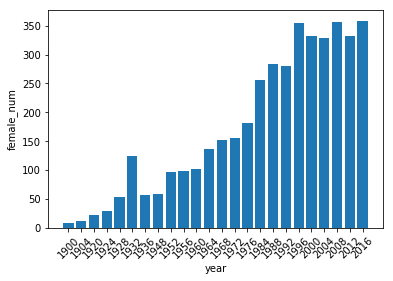

In [75]:
_.bar()

The plot above shows the number of female athletes in US in summer olympic games. 

In [76]:
%%sql
SELECT DISTINCT YEAR,PERCENT_INCREASE*100 as PERCENT_INCREASE
FROM female_US3 
WHERE YEAR!=2016;

 * postgresql://student@/project_olympic
23 rows affected.


year,percent_increase
1992,26.7857142857143
1952,1.03092783505155
1964,11.7647058823529
1900,50.0
1924,86.2068965517241
1928,129.62962962963
2008,-6.46067415730337
1956,4.08163265306122
1996,-6.47887323943662
1920,31.8181818181818


In [77]:
%matplotlib inline

<BarContainer object of 23 artists>

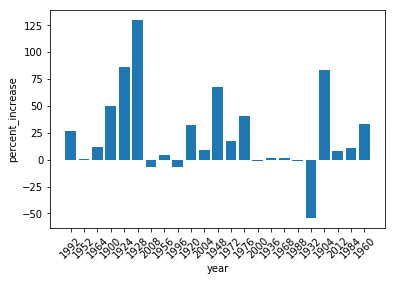

In [78]:
_.bar()

The plot above shows the number of increase percent of female athletes in US in summer olympic games. 

In [79]:
%%sql
DROP TABLE IF EXISTS female_medal_US1;

CREATE TABLE female_medal_US1 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [80]:
%%sql
DROP TABLE IF EXISTS female_medal_US2;

CREATE TABLE female_medal_US2 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [81]:
%%sql
INSERT INTO female_medal_US1(SEASON,YEAR,COUNTRY,COUNT)
SELECT hosting_country.season, hosting_country.year, demographics.TEAM,count(demographics.sex) as count
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
JOIN SPORTS
    ON olympic.SPORTS_key = SPORTS.key
Where demographics.sex = 'F' AND demographics.TEAM='United States'and season = 'Summer'AND olympic.MEDAL!='NA'
Group by hosting_country.season, hosting_country.year,demographics.TEAM
Order by hosting_country.year

 * postgresql://student@/project_olympic
24 rows affected.


[]

In [82]:
%%sql
INSERT INTO female_medal_US2(SEASON,YEAR,COUNTRY,COUNT)
SELECT hosting_country.season, hosting_country.year,demographics.TEAM,count(demographics.sex) as count
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
JOIN SPORTS
    ON olympic.SPORTS_key = SPORTS.key
Where demographics.sex = 'F' AND demographics.TEAM='United States'and season =  'Summer'AND olympic.MEDAL!='NA'
Group by hosting_country.season, hosting_country.year,demographics.TEAM
Order by hosting_country.year

 * postgresql://student@/project_olympic
24 rows affected.


[]

Create the third table to calculate the percentage of increase of female athletes of US. 

In [83]:
%%sql
DROP TABLE IF EXISTS female_medal_US3;

CREATE TABLE female_medal_US3(
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT,
    PERCENT_INCREASE FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [84]:
%%sql
INSERT INTO female_medal_US3(SEASON,YEAR,COUNTRY,Count,PERCENT_INCREASE)
SELECT female_medal_US1.season,female_medal_US1.year,female_medal_US1.COUNTRY,female_medal_US1.COUNT,(female_medal_US2.COUNT-female_medal_US1.COUNT)/female_medal_US1.COUNT AS PERCENT_INCREASE
FROM female_medal_US1
LEFT JOIN female_medal_US2
ON female_medal_US1.KEY +1 = female_medal_US2.KEY;

 * postgresql://student@/project_olympic
24 rows affected.


[]

In [85]:
%%sql
SELECT year,count FROM female_medal_US3;

 * postgresql://student@/project_olympic
24 rows affected.


year,count
1900,4.0
1904,6.0
1920,14.0
1924,19.0
1928,22.0
1932,28.0
1936,17.0
1948,22.0
1952,14.0
1956,23.0


<BarContainer object of 24 artists>

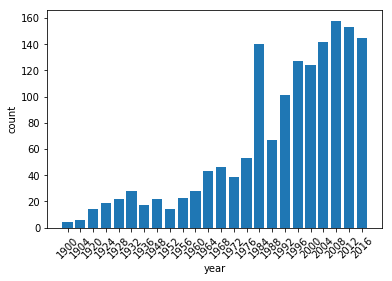

In [86]:
_.bar()

The plot shows the number of medals won by females from 1900 to 2016 summer games of team US. 

In [87]:
%%sql
SELECT year,PERCENT_INCREASE*100 as female_medal_increase FROM female_medal_US3
where year!=2016;

 * postgresql://student@/project_olympic
23 rows affected.


year,female_medal_increase
1900,50.0
1904,133.333333333333
1920,35.7142857142857
1924,15.7894736842105
1928,27.2727272727273
1932,-39.2857142857143
1936,29.4117647058824
1948,-36.3636363636364
1952,64.2857142857143
1956,21.7391304347826


<BarContainer object of 23 artists>

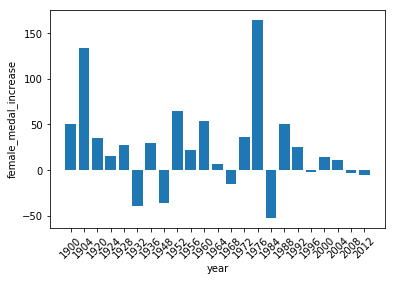

In [88]:
_.bar()

The plot shows the percetage of increase of number of medals won by females from 1900 to 2016 summer games of team US.

In the same way, we calculate the number and the percent of male athletes, the number of and the increase percent of medals .

In [89]:
%%sql
DROP TABLE IF EXISTS male_US1;

CREATE TABLE male_US1 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [90]:
%%sql
DROP TABLE IF EXISTS male_US2;

CREATE TABLE male_US2 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [91]:
%%sql
INSERT INTO male_US1(SEASON,YEAR,COUNTRY,COUNT)
SELECT DISTINCT hosting_country.season, hosting_country.year,demographics.TEAM,count(demographics.key) as count
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
Where demographics.sex = 'M' AND demographics.TEAM='United States'and season =  'Summer'
Group by hosting_country.season, hosting_country.year,demographics.TEAM
Order by hosting_country.year;

 * postgresql://student@/project_olympic
28 rows affected.


[]

In [92]:
%%sql
INSERT INTO male_US2(SEASON,YEAR,COUNTRY,COUNT)
SELECT DISTINCT hosting_country.season, hosting_country.year,demographics.TEAM,count(demographics.key) as count
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
Where demographics.sex = 'M' AND demographics.TEAM='United States'and season =  'Summer'
Group by hosting_country.season, hosting_country.year,demographics.TEAM
Order by hosting_country.year;

 * postgresql://student@/project_olympic
28 rows affected.


[]

In [93]:
%%sql
SELECT * FROM male_US1 limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


key,season,year,country,count
1,Summer,1896,United States,27.0
2,Summer,1900,United States,106.0
3,Summer,1904,United States,811.0
4,Summer,1906,United States,81.0
5,Summer,1908,United States,219.0


The third table to count the increase percent using the tables of number of increase

In [94]:
%%sql
DROP TABLE IF EXISTS male_US3;

CREATE TABLE male_US3 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT,
    PERCENT_INCREASE FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [95]:
%%sql
INSERT INTO male_US3(SEASON,YEAR,COUNTRY,Count,PERCENT_INCREASE)
SELECT DISTINCT male_US1.season,male_US1.year,male_US1.COUNTRY,male_US1.COUNT,(male_US2.COUNT-male_US1.COUNT)/male_US1.COUNT AS PERCENT_INCREASE
FROM male_US1
LEFT JOIN male_US2
ON male_US1.KEY +1 = male_US2.KEY;


 * postgresql://student@/project_olympic
28 rows affected.


[]

In [96]:
%%sql
SELECT DISTINCT YEAR,COUNT as male_num
FROM male_US3 
where year!=1980;

 * postgresql://student@/project_olympic
28 rows affected.


year,male_num
1956,333.0
2012,336.0
2016,340.0
1960,316.0
1920,451.0
1968,377.0
1964,346.0
1948,354.0
1904,811.0
1984,437.0


<BarContainer object of 28 artists>

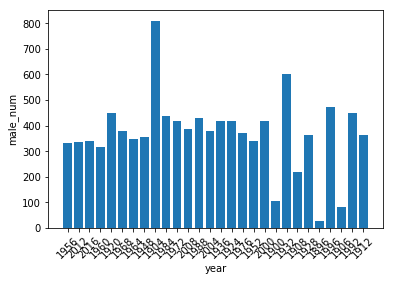

In [97]:
_.bar()

The plot above shows the number of male athletes in US in summer olympic games. 

In [98]:
%%sql
SELECT DISTINCT YEAR,COUNT as male_num
FROM male_US3 
where year!=1980;

 * postgresql://student@/project_olympic
28 rows affected.


year,male_num
1956,333.0
2012,336.0
2016,340.0
1960,316.0
1920,451.0
1968,377.0
1964,346.0
1948,354.0
1904,811.0
1984,437.0


In [99]:
%matplotlib inline

<BarContainer object of 28 artists>

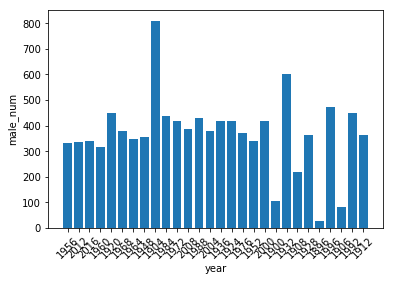

In [100]:
_.bar()

The plot above shows the number of male athletes in US in summer olympic games. 

In [101]:
%%sql
SELECT DISTINCT YEAR,PERCENT_INCREASE*100 as PERCENT_INCREASE
FROM male_US3 
WHERE YEAR!=2016 and YEAR!=1980;

 * postgresql://student@/project_olympic
27 rows affected.


year,percent_increase
1906,170.37037037037
1904,-90.0123304562269
2012,1.19047619047619
2000,-9.13461538461538
1896,292.592592592593
2008,-13.4020618556701
1924,-13.3971291866029
1952,-1.76991150442478
1992,5.35714285714286
1920,-7.31707317073171


In [102]:
%matplotlib inline

<BarContainer object of 27 artists>

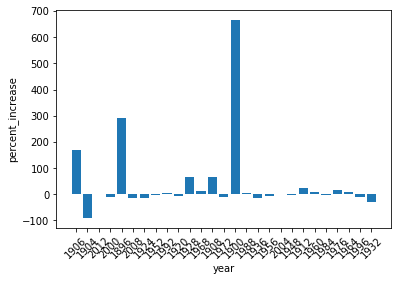

In [103]:
_.bar()

The plot above shows the increase percent of male athletes in US in summer olympic games. 

In [104]:
%%sql
DROP TABLE IF EXISTS male_medal_US1;

CREATE TABLE male_medal_US1 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [105]:
%%sql
DROP TABLE IF EXISTS male_medal_US2;

CREATE TABLE male_medal_US2 (
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [106]:
%%sql
INSERT INTO male_medal_US1(SEASON,YEAR,COUNTRY,COUNT)
SELECT hosting_country.season, hosting_country.year,demographics.TEAM,count(demographics.sex) as count
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
JOIN SPORTS
    ON olympic.SPORTS_key = SPORTS.key
Where demographics.sex = 'M' AND demographics.TEAM='United States'and season = 'Summer'AND olympic.MEDAL!='NA'
Group by hosting_country.season, hosting_country.year,demographics.TEAM
Order by hosting_country.year;

 * postgresql://student@/project_olympic
28 rows affected.


[]

In [107]:
%%sql
INSERT INTO male_medal_US2(SEASON,YEAR,COUNTRY,COUNT)
SELECT hosting_country.season, hosting_country.year,demographics.TEAM,count(demographics.sex) as count
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
JOIN SPORTS
    ON olympic.SPORTS_key = SPORTS.key
Where demographics.sex = 'M' AND demographics.TEAM='United States'and season =  'Summer'AND olympic.MEDAL!='NA'
Group by hosting_country.season, hosting_country.year,demographics.TEAM
Order by hosting_country.year;

 * postgresql://student@/project_olympic
28 rows affected.


[]

Create the third table to calculate the percentage of increase of male athletes of US. 

In [108]:
%%sql
DROP TABLE IF EXISTS male_medal_US3;

CREATE TABLE male_medal_US3(
    key SERIAL,
    SEASON CHAR(6),
    YEAR   INTEGER,
    COUNTRY VARCHAR(30),
    COUNT FLOAT,
    PERCENT_INCREASE FLOAT
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [109]:
%%sql
INSERT INTO male_medal_US3(SEASON,YEAR,COUNTRY,Count,PERCENT_INCREASE)
SELECT male_medal_US1.season,male_medal_US1.year,male_medal_US1.COUNTRY,male_medal_US1.COUNT,(male_medal_US2.COUNT-male_medal_US1.COUNT)/male_medal_US1.COUNT AS PERCENT_INCREASE
FROM male_medal_US1
LEFT JOIN male_medal_US2
ON male_medal_US1.KEY +1 = male_medal_US2.KEY;


 * postgresql://student@/project_olympic
28 rows affected.


[]

In [110]:
%%sql
SELECT year,count FROM male_medal_US3;

 * postgresql://student@/project_olympic
28 rows affected.


year,count
1896,20.0
1900,41.0
1904,193.0
1906,24.0
1908,65.0
1912,107.0
1920,180.0
1924,155.0
1928,66.0
1932,142.0


In [111]:
%matplotlib inline

<BarContainer object of 28 artists>

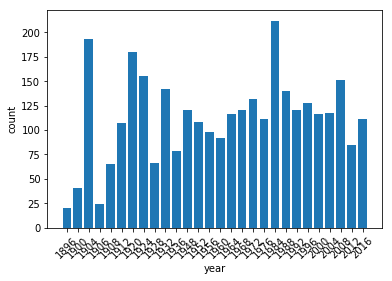

In [112]:
_.bar()

The plot shows the number of medals won by males from 1900 to 2016 summer games of team US. There seems to have problems with the data in year 2016(number is less than 10), so that row is deleted, avioding the percent of increase affected greatly by that outlier. 

In [113]:
%%sql
SELECT year,PERCENT_INCREASE*100 as male_medal_increase FROM male_medal_US3
where year!=2016;

 * postgresql://student@/project_olympic
27 rows affected.


year,male_medal_increase
1896,105.0
1900,370.731707317073
1904,-87.5647668393782
1906,170.833333333333
1908,64.6153846153846
1912,68.2242990654206
1920,-13.8888888888889
1924,-57.4193548387097
1928,115.151515151515
1932,-44.3661971830986


In [114]:
%matplotlib inline

<BarContainer object of 27 artists>

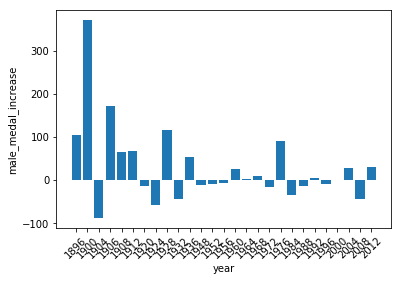

In [115]:
_.bar()

The plot above shows the increase percent of medals won by males in United States.

#### Conclusion:
In general, the participation and the number of medals contribution by female athletes have significantly improved by years. 
In recent years, the number of female athletes attending to Olympic games is close to male athletes, furthermore, the number of medals gained by females become more than male athletes. 

#### 3.2. Select 5 most popular sports and analyze the physical characteristics of top athletes who have the best performance in those sports.

Find top 5 most popular sports based on the total number of medals in these games.

In [116]:
%%sql
SELECT DISTINCT S.sport, count(O.medal)
FROM sports as S JOIN olympic as O
ON S.key = O.sports_key
GROUP BY S.sport
ORDER BY count(O.medal) DESC
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


sport,count
Athletics,38624
Gymnastics,26707
Swimming,23195
Shooting,11448
Cycling,10859


Top 5 most popular sports are Athletics, Gymnastics, Swimming, Shooting and Cycling.

Analyze physical characteristics of athletes in Athletics games

In [117]:
%%sql
DROP TABLE IF EXISTS top_athletics;

CREATE TABLE top_athletics (
    ID      INTEGER,
    GAME    VARCHAR(80),
    COUNT_MEDALS   INTEGER,
    WEIGHT  INTEGER,
    HEIGHT  INTEGER
);


 * postgresql://student@/project_olympic
Done.
Done.


[]

In [118]:
%%sql
INSERT INTO top_athletics
SELECT  D.id , S.sport, count(O.medal), P.weight, P.height
FROM olympic as O 
JOIN sports as S ON O.sports_key = S.key
JOIN demographics as D on D.key = O.demographics_key
JOIN physical_characteristics as P ON P.key = O.physical_characteristics_key
WHERE O.medal != 'NA'
AND S.sport = 'Athletics'
GROUP BY D.id, S.sport, P.weight, P.height
HAVING count(O.medal) > 5
ORDER BY count(O.medal) DESC
;

 * postgresql://student@/project_olympic
19 rows affected.


[]

In [119]:
%%sql
SELECT * FROM top_athletics
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,game,count_medals,weight,height
87390,Athletics,12,65,174
69210,Athletics,10,80,188
33557,Athletics,10,79,185
109597,Athletics,9,88,190
34551,Athletics,9,56,168


Analyze physical characteristics of athletes in Gymnastics games

In [120]:
%%sql
DROP TABLE IF EXISTS top_gymnastics;

CREATE TABLE top_gymnastics (
    ID      INTEGER,
    GAME    VARCHAR(80),
    COUNT_MEDALS   INTEGER,
    WEIGHT  INTEGER,
    HEIGHT  INTEGER
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [121]:
%%sql
INSERT INTO top_gymnastics
SELECT  D.id , S.sport, count(O.medal), P.weight, P.height
FROM olympic as O 
JOIN sports as S ON O.sports_key = S.key
JOIN demographics as D on D.key = O.demographics_key
JOIN physical_characteristics as P ON P.key = O.physical_characteristics_key
WHERE O.medal != 'NA'
AND S.sport = 'Gymnastics'
GROUP BY D.id, S.sport,P.weight, P.height
HAVING count(O.medal) > 8
ORDER BY count(O.medal) DESC
;

 * postgresql://student@/project_olympic
18 rows affected.


[]

In [122]:
%%sql
SELECT * FROM top_gymnastics
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,game,count_medals,weight,height
67046,Gymnastics,18,52,161
4198,Gymnastics,15,60,166
109161,Gymnastics,13,71,171
89187,Gymnastics,13,58,160
85286,Gymnastics,12,75,174


Analyze physical characteristics of athletes in Swimming games

In [123]:
%%sql
DROP TABLE IF EXISTS top_swimming;

CREATE TABLE top_swimming (
    ID      INTEGER,
    GAME    VARCHAR(80),
    COUNT_MEDALS   INTEGER,
    WEIGHT  INTEGER,
    HEIGHT  INTEGER
);


 * postgresql://student@/project_olympic
Done.
Done.


[]

In [124]:
%%sql
INSERT INTO top_swimming
SELECT  D.id , S.sport, count(O.medal), P.weight, P.height
FROM olympic as O 
JOIN sports as S ON O.sports_key = S.key
JOIN demographics as D on D.key = O.demographics_key
JOIN physical_characteristics as P ON P.key = O.physical_characteristics_key
WHERE O.medal != 'NA'
AND S.sport = 'Swimming'
GROUP BY D.id, S.sport, P.weight, P.height
HAVING count(O.medal) > 7
ORDER BY count(O.medal) DESC
;

 * postgresql://student@/project_olympic
26 rows affected.


[]

In [125]:
%%sql
SELECT * FROM top_swimming
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,game,count_medals,weight,height
94406,Swimming,28,91,193
119922,Swimming,12,69,177
70965,Swimming,12,88,188
121258,Swimming,12,68,183
23426,Swimming,12,63,173


#### Analyze physical characteristics of athletes in Shooting games

In [126]:
%%sql
DROP TABLE IF EXISTS top_shooting;

CREATE TABLE top_shooting (
    ID      INTEGER,
    GAME    VARCHAR(80),
    COUNT_MEDALS   INTEGER,
    WEIGHT  INTEGER,
    HEIGHT  INTEGER
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [127]:
%%sql
INSERT INTO top_shooting
SELECT  D.id , S.sport, count(O.medal), P.weight, P.height
FROM olympic as O 
JOIN sports as S ON O.sports_key = S.key
JOIN demographics as D on D.key = O.demographics_key
JOIN physical_characteristics as P ON P.key = O.physical_characteristics_key
WHERE O.medal != 'NA'
AND S.sport = 'Shooting'
GROUP BY D.id, S.sport, P.weight, P.height
HAVING count(O.medal) > 2
ORDER BY count(O.medal) DESC
;

 * postgresql://student@/project_olympic
28 rows affected.


[]

In [128]:
%%sql
SELECT * FROM top_shooting
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,game,count_medals,weight,height
100315,Shooting,6,82,163
54882,Shooting,6,78,175
128626,Shooting,6,85,174
43252,Shooting,5,63,163
107734,Shooting,5,73,167


Analyze physical characteristics of athletes in Cycling games

In [129]:
%%sql
DROP TABLE IF EXISTS top_cycling;

CREATE TABLE top_cycling (
    ID      INTEGER,
    GAME    VARCHAR(80),
    COUNT_MEDALS   INTEGER,
    WEIGHT  INTEGER,
    HEIGHT  INTEGER
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [130]:
%%sql
INSERT INTO top_cycling
SELECT  D.id , S.sport, count(O.medal), P.weight, P.height
FROM olympic as O 
JOIN sports as S ON O.sports_key = S.key
JOIN demographics as D on D.key = O.demographics_key
JOIN physical_characteristics as P ON P.key = O.physical_characteristics_key
WHERE O.medal != 'NA'
AND S.sport = 'Cycling'
GROUP BY D.id, S.sport, P.weight, P.height
HAVING count(O.medal) > 3
ORDER BY count(O.medal) DESC
;

 * postgresql://student@/project_olympic
23 rows affected.


[]

In [131]:
%%sql
SELECT * FROM top_cycling
limit 5;

 * postgresql://student@/project_olympic
5 rows affected.


id,game,count_medals,weight,height
130311,Cycling,8,82,190
50383,Cycling,7,93,185
58744,Cycling,7,81,178
134980,Cycling,6,69,168
78005,Cycling,6,70,165


#### Compare the average physical characteristics of athletes in top 5 popular sports.

In [132]:
%%sql
DROP TABLE IF EXISTS top_athletes;

CREATE TABLE top_athletes (
    GAME    VARCHAR(80),
    AVG_WEIGHT   INTEGER,
    AVG_HEIGHT  INTEGER
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [133]:
%%sql
INSERT INTO top_athletes
SELECT GAME as game, AVG(weight) as avg_weight, AVG(height) as avg_height
FROM top_swimming 
GROUP BY game
UNION
SELECT GAME as game, AVG(weight) as avg_weight, AVG(height) as avg_height
FROM top_athletics 
GROUP BY game
UNION
SELECT GAME as game, AVG(weight) as avg_weight, AVG(height) as avg_height
FROM top_gymnastics
GROUP BY game
UNION
SELECT GAME as game, AVG(weight) as avg_weight, AVG(height) as avg_height
FROM top_shooting
GROUP BY game
UNION
SELECT GAME as game, AVG(weight) as avg_weight, AVG(height) as avg_height
FROM top_cycling
GROUP BY game
;

 * postgresql://student@/project_olympic
5 rows affected.


[]

In [134]:
%%sql
SELECT * FROM top_athletes;

 * postgresql://student@/project_olympic
5 rows affected.


game,avg_weight,avg_height
Athletics,72,178
Swimming,77,183
Shooting,75,172
Cycling,77,178
Gymnastics,61,166


In [135]:
%%sql
SELECT game,avg_weight
FROM top_athletes
ORDER BY avg_weight DESC;

 * postgresql://student@/project_olympic
5 rows affected.


game,avg_weight
Swimming,77
Cycling,77
Shooting,75
Athletics,72
Gymnastics,61


In [136]:
%matplotlib inline

<BarContainer object of 5 artists>

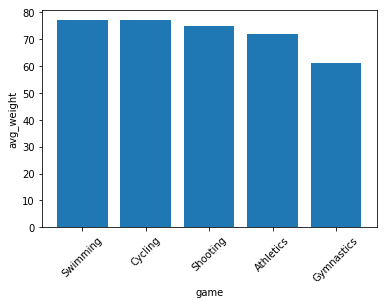

In [137]:
_.bar()

In [138]:
%%sql
SELECT game,avg_height
FROM top_athletes
ORDER BY avg_height DESC;

 * postgresql://student@/project_olympic
5 rows affected.


game,avg_height
Swimming,183
Athletics,178
Cycling,178
Shooting,172
Gymnastics,166


<BarContainer object of 5 artists>

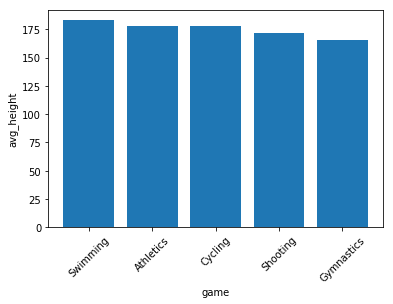

In [139]:
_.bar()

#### Conclusion
According to the results, while other sports’ athletes have the same average height and weight, the world's best gymnastics tend to be significantly shorter and lighter.
The reason may be because they train so hard, so long, for so many years, it is a critical factor to the growth and bone development.


#### 3.3. How athletes’ performances change when the Olympic game is hosted in their own country compares to when in other country.

Since countries that hosted multiple times of Olympic games has strong comprehensive national strength. Their athletes have more possibility to earn medals than countries that never or rarely had chance to hold an olympic game. Therefore, I am going to mainly focus on countries that only hosted one time of Olympic game. 

Firstly, find out the number of games hosted in each country. Then, find three countries that only hosted one time Olympic game to do further analyze. 

Create a table named Number_of_Times

In [140]:
%%sql
DROP TABLE IF EXISTS Number_of_Times;

CREATE TABLE Number_of_Times (
    SEASON  CHAR(6),
    YEAR    INTEGER,
    COUNTRY CHAR(30)
);

 * postgresql://student@/project_olympic
Done.
Done.


[]

In [141]:
%%sql
INSERT INTO Number_of_Times
SELECT hosting_country.season, hosting_country.year, hosting_country.country
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
Group by hosting_country.season, hosting_country.year, hosting_country.country
Order by hosting_country.year

 * postgresql://student@/project_olympic
52 rows affected.


[]

In [142]:
%%sql
SELECT * 
FROM Number_of_Times
Limit 10;

 * postgresql://student@/project_olympic
10 rows affected.


season,year,country
Summer,1896,Greece
Summer,1900,France
Summer,1904,United States
Summer,1906,Greece
Summer,1908,United Kingdom
Summer,1912,Sweden
Summer,1920,Belgium
Winter,1924,France
Summer,1924,France
Winter,1928,Switzerland


Find the number of times each country hosts an olympic game

In [143]:
%%sql
SELECT season, country, count(country) as numberOfTimes
FROM Number_of_Times
GROUP BY season, country
ORDER BY country, numberOfTimes;

 * postgresql://student@/project_olympic
30 rows affected.


season,country,numberoftimes
Summer,Australia,2
Winter,Austria,2
Summer,Belgium,1
Summer,Brazil,1
Summer,Canada,1
Winter,Canada,2
Summer,China,1
Summer,Finland,1
Summer,France,2
Winter,France,3


From the above table, there are 9 countries hosted 1 time during the history of olympic. They are Belgium, Brazil, China, Finland, Mexico, Netherlands, South Korea, Spain, Yugoslavia.

In [144]:
%%sql
SELECT hosting_country.season, hosting_country.year, hosting_country.country as hosting_country, olympic.noc, count(olympic.medal) as medal_gain
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
WHERE 
hosting_country.country = 'Belgium' AND olympic.noc = 'BEL'  AND olympic.medal != 'NA'
OR hosting_country.country = 'Brazil' AND olympic.noc = 'BRA'  AND olympic.medal != 'NA'
OR hosting_country.country = 'China' AND olympic.noc = 'CHN'  AND  olympic.medal != 'NA'
OR hosting_country.country = 'Finland' AND olympic.noc = 'FIN'  AND  olympic.medal != 'NA'
OR hosting_country.country = 'Mexico' AND olympic.noc = 'MEX'  AND  olympic.medal != 'NA'
OR hosting_country.country = 'Netherlands' AND olympic.noc = 'NED'  AND  olympic.medal != 'NA'
OR hosting_country.country = 'South Korea' AND olympic.noc = 'KOR'  AND  olympic.medal != 'NA'
OR hosting_country.country = 'Spain' AND olympic.noc = 'ESP'  AND  olympic.medal != 'NA'
OR hosting_country.country = 'Yugoslavia' AND olympic.noc = 'YUG'  AND  olympic.medal != 'NA'
Group by hosting_country.season, hosting_country.year, hosting_country.country, olympic.noc
Order by hosting_country.year, hosting_country.country

 * postgresql://student@/project_olympic
9 rows affected.


season,year,hosting_country,noc,medal_gain
Summer,1920,Belgium,BEL,188
Summer,1928,Netherlands,NED,57
Summer,1952,Finland,FIN,40
Summer,1968,Mexico,MEX,9
Winter,1984,Yugoslavia,YUG,1
Summer,1988,South Korea,KOR,77
Summer,1992,Spain,ESP,69
Summer,2008,China,CHN,184
Summer,2016,Brazil,BRA,50


Select three countries to do further analyzation:
* China -- Summer 2008
* South Korea -- Summer 1988
* Brazil -- Summer 2016

For these countries, I calculated the percentage of medal that each athlete team got when their own country hosted Olympic games, then compared with the percentage of medal that the team got in previous Olympic game and the next Olympic game when they competed at other hosting countries. Then I will evaluate if the hosting country is a factor affecting to athletes' performance.

#### 3.3.1. China hosted Olympic Summer 2008

In [238]:
%%sql
SELECT hosting_country.year, hosting_country.country, olympic.medal, olympic.noc, demographics.ID
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'China'
AND olympic.noc = 'CHN'
AND olympic.medal != 'NA'
AND hosting_country.year = 2008
ORDER BY olympic.medal

 * postgresql://student@/project_olympic
184 rows affected.


year,country,medal,noc,id
2008,China,Bronze,CHN,134597
2008,China,Bronze,CHN,132115
2008,China,Bronze,CHN,132112
2008,China,Bronze,CHN,69422
2008,China,Bronze,CHN,29368
2008,China,Bronze,CHN,132103
2008,China,Bronze,CHN,69515
2008,China,Bronze,CHN,134840
2008,China,Bronze,CHN,134820
2008,China,Bronze,CHN,34612


In [240]:
%%sql
SELECT count(olympic.medal), olympic.medal
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'China'
AND olympic.noc = 'CHN'
AND olympic.medal != 'NA'
AND hosting_country.year = 2008
GROUP BY rollup(olympic.medal)
ORDER BY medal;

 * postgresql://student@/project_olympic
4 rows affected.


count,medal
57,Bronze
74,Gold
53,Silver
184,None


China earned total 184 medals, 57 Bronze, 74 Gold, 53 Silver in Summer 2008 Olympic

Check and compare medals that hosting country (China) earned and compare to the total number of medals awarded to all winners from other countries in Summer 2008:

In [256]:
%%sql
SELECT count(olympic.medal) as tota_medals, olympic.medal as medal_type, hosting_country.country as host_country
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
WHERE hosting_country.country = 'China'
AND olympic.medal != 'NA'
AND hosting_country.year = 2008
GROUP BY rollup(olympic.medal), hosting_country.country
ORDER BY medal;

 * postgresql://student@/project_olympic
4 rows affected.


tota_medals,medal_type,host_country
710,Bronze,China
671,Gold,China
667,Silver,China
2048,None,China


##### Chinese athletes' performance at the previouse Summer olympic - Summer 2004 at Greece

In [243]:
%%sql
SELECT hosting_country.year, hosting_country.country, olympic.medal, olympic.noc, demographics.ID
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'Greece'
AND olympic.noc = 'CHN'
AND olympic.medal != 'NA'
AND hosting_country.year = 2004
ORDER BY olympic.medal

 * postgresql://student@/project_olympic
94 rows affected.


year,country,medal,noc,id
2004,Greece,Bronze,CHN,86569
2004,Greece,Bronze,CHN,38401
2004,Greece,Bronze,CHN,50641
2004,Greece,Bronze,CHN,128649
2004,Greece,Bronze,CHN,135270
2004,Greece,Bronze,CHN,128520
2004,Greece,Bronze,CHN,128418
2004,Greece,Bronze,CHN,134524
2004,Greece,Bronze,CHN,120212
2004,Greece,Bronze,CHN,116459


In [251]:
%%sql
SELECT count(olympic.medal), olympic.medal
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'Greece'
AND olympic.noc = 'CHN'
AND olympic.medal != 'NA'
AND hosting_country.year = 2004
GROUP BY rollup(olympic.medal);

 * postgresql://student@/project_olympic
4 rows affected.


count,medal
15,Bronze
52,Gold
27,Silver
94,None


China team earned total 94 medals, 15 Bronze, 52 Gold, 27 Silver in 2004 Greece Olympic

Check and compare the medals that Chinese athletes team earned and compare to the total number of medals awarded to all winners from other countries in Summer 2004:

In [257]:
%%sql
SELECT count(olympic.medal) as total_medals, olympic.medal as medal_type, hosting_country.country as host_country
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
WHERE hosting_country.country = 'Greece'
AND olympic.medal != 'NA'
AND hosting_country.year = 2004
GROUP BY rollup(olympic.medal), hosting_country.country

 * postgresql://student@/project_olympic
4 rows affected.


total_medals,medal_type,host_country
677,Bronze,Greece
664,Gold,Greece
660,Silver,Greece
2001,None,Greece


##### Chinese athletes' performance at the previouse Summer olympic - Summer 2012 at United Kingdom

In [248]:
%%sql
SELECT hosting_country.year, hosting_country.country, olympic.medal, olympic.noc, demographics.ID
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'United Kingdom'
AND olympic.noc = 'CHN'
AND olympic.medal != 'NA'
AND hosting_country.year = 2012
ORDER BY olympic.medal

 * postgresql://student@/project_olympic
125 rows affected.


year,country,medal,noc,id
2012,United Kingdom,Bronze,CHN,118439
2012,United Kingdom,Bronze,CHN,24911
2012,United Kingdom,Bronze,CHN,24913
2012,United Kingdom,Bronze,CHN,45881
2012,United Kingdom,Bronze,CHN,46922
2012,United Kingdom,Bronze,CHN,71898
2012,United Kingdom,Bronze,CHN,46936
2012,United Kingdom,Bronze,CHN,70660
2012,United Kingdom,Bronze,CHN,133299
2012,United Kingdom,Bronze,CHN,70620


In [250]:
%%sql
SELECT count(olympic.medal), olympic.medal
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'United Kingdom'
AND olympic.noc = 'CHN'
AND olympic.medal != 'NA'
AND hosting_country.year = 2012
GROUP BY rollup(olympic.medal)

 * postgresql://student@/project_olympic
4 rows affected.


count,medal
29,Bronze
56,Gold
40,Silver
125,None


Chinese athletes team earned total 125 medals, 29 Bronze, 56 Gold, 40 Silver in 2012 United Kingdom Olympic

Check and compare the medals that Chinese athletes team earned and compare to the total number of medals awarded to all winners from other countries in Summer 2012:

In [255]:
%%sql
SELECT count(olympic.medal) as total_medals, olympic.medal as medal_type, hosting_country.country as host_country
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
WHERE hosting_country.country = 'United Kingdom'
AND hosting_country.year = '2012'
AND olympic.medal != 'NA'
GROUP BY  hosting_country.country, rollup(olympic.medal)

 * postgresql://student@/project_olympic
4 rows affected.


total_medals,medal_type,host_country
679,Bronze,United Kingdom
632,Gold,United Kingdom
630,Silver,United Kingdom
1941,None,United Kingdom


#### 3.3.2. South Korea hosted Olympic Summer 1988

In [258]:
%%sql
SELECT hosting_country.year, hosting_country.country, olympic.medal, olympic.noc, demographics.ID
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'South Korea'
AND olympic.noc = 'KOR'
AND olympic.medal != 'NA'
AND hosting_country.year = 1988
ORDER BY olympic.medal

 * postgresql://student@/project_olympic
77 rows affected.


year,country,medal,noc,id
1988,South Korea,Bronze,KOR,60287
1988,South Korea,Bronze,KOR,60202
1988,South Korea,Bronze,KOR,133496
1988,South Korea,Bronze,KOR,55008
1988,South Korea,Bronze,KOR,133350
1988,South Korea,Bronze,KOR,91554
1988,South Korea,Bronze,KOR,86652
1988,South Korea,Bronze,KOR,67981
1988,South Korea,Bronze,KOR,67978
1988,South Korea,Bronze,KOR,67950


In [278]:
%%sql
SELECT count(olympic.medal), olympic.medal
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'South Korea'
AND olympic.noc = 'KOR'
AND olympic.medal != 'NA'
AND hosting_country.year = 1988
GROUP BY rollup(olympic.medal)

 * postgresql://student@/finalgroup5
4 rows affected.


count,medal
12,Bronze
28,Gold
37,Silver
77,None


South Korea earned total 77 medals, 12 Bronze, 28 Gold, 37 Silver in 1988 South Korea Olympic

Check and compare the medals that Korean athletes team earned and compare to the total number of medals awarded to all winners from other countries in Summer 1988:

In [264]:
%%sql
SELECT count(olympic.medal) as total_medals, olympic.medal as medal_type, hosting_country.country as host_country
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
WHERE hosting_country.country = 'South Korea'
AND olympic.medal != 'NA'
AND hosting_country.year = 1988
GROUP BY rollup(olympic.medal), hosting_country.country

 * postgresql://student@/project_olympic
4 rows affected.


total_medals,medal_type,host_country
549,Bronze,South Korea
520,Gold,South Korea
513,Silver,South Korea
1582,None,South Korea


#### South Korea athletes' performance at Olympic Summer 1984 in United States.

In [261]:
%%sql
SELECT hosting_country.year, hosting_country.country, olympic.medal, olympic.noc, demographics.ID
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'United States'
AND olympic.noc = 'KOR'
AND olympic.medal != 'NA'
AND hosting_country.year = 1984
ORDER BY olympic.medal

 * postgresql://student@/project_olympic
41 rows affected.


year,country,medal,noc,id
1984,United States,Bronze,KOR,54474
1984,United States,Bronze,KOR,55008
1984,United States,Bronze,KOR,60294
1984,United States,Bronze,KOR,7494
1984,United States,Bronze,KOR,60052
1984,United States,Bronze,KOR,113066
1984,United States,Bronze,KOR,67990
1984,United States,Gold,KOR,110933
1984,United States,Gold,KOR,44417
1984,United States,Gold,KOR,60306


In [283]:
%%sql
SELECT count(olympic.medal), olympic.medal
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'United States'
AND olympic.noc = 'KOR'
AND olympic.medal != 'NA'
AND hosting_country.year = 1984
GROUP BY rollup(olympic.medal)

 * postgresql://student@/finalgroup5
4 rows affected.


count,medal
7,Bronze
6,Gold
28,Silver
41,None


South Korea earned total 41 medals, 7 Bronze, 6 Gold, 28 Silver in 1984 USA Olympic

Check and compare the medals that Korean athletes team earned and compare to the total number of medals awarded to all winners from other countries in Summer 1984:

In [263]:
%%sql
SELECT count(olympic.medal) as total_medals, olympic.medal as medal_type, hosting_country.country as host_country
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
WHERE hosting_country.country = 'United States'
AND olympic.medal != 'NA'
AND hosting_country.year = 1984
GROUP BY rollup(olympic.medal), hosting_country.country

 * postgresql://student@/project_olympic
4 rows affected.


total_medals,medal_type,host_country
502,Bronze,United States
497,Gold,United States
477,Silver,United States
1476,None,United States


#### South Korea athletes' performance at Olympic Summer 1992 in Spain

In [265]:
%%sql
SELECT hosting_country.year, hosting_country.country, olympic.medal, olympic.noc, demographics.ID
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'Spain'
AND olympic.noc = 'KOR'
AND olympic.medal != 'NA'
AND hosting_country.year = 1992
ORDER BY olympic.medal

 * postgresql://student@/project_olympic
49 rows affected.


year,country,medal,noc,id
1992,Spain,Bronze,KOR,38319
1992,Spain,Bronze,KOR,110602
1992,Spain,Bronze,KOR,54539
1992,Spain,Bronze,KOR,68135
1992,Spain,Bronze,KOR,133350
1992,Spain,Bronze,KOR,49712
1992,Spain,Bronze,KOR,40515
1992,Spain,Bronze,KOR,59783
1992,Spain,Bronze,KOR,51421
1992,Spain,Bronze,KOR,51421


In [288]:
%%sql
SELECT count(olympic.medal), olympic.noc, olympic.medal
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'Spain'
AND olympic.noc = 'KOR'
AND olympic.medal != 'NA'
AND hosting_country.year = 1992
GROUP BY olympic.noc, rollup(olympic.medal)

 * postgresql://student@/finalgroup5
4 rows affected.


count,noc,medal
16,KOR,Bronze
28,KOR,Gold
5,KOR,Silver
49,KOR,None


Brazil earned total 49 medals, 16 Bronze, 28 Gold, 5 Silver in 1992 Summer Olympic

Check and compare the medals that Korean athletes team earned and compare to the total number of medals awarded to all winners from other countries in Summer 1992:

In [267]:
%%sql
SELECT count(olympic.medal), olympic.medal, hosting_country.country
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
WHERE hosting_country.country = 'Spain'
AND olympic.medal != 'NA'
AND hosting_country.year = 1992
GROUP BY rollup(olympic.medal), hosting_country.country

 * postgresql://student@/project_olympic
4 rows affected.


count,medal,country
604,Bronze,Spain
559,Gold,Spain
549,Silver,Spain
1712,None,Spain


#### 3.3.3. Brazil hosted Olympic Summer 2016

In [268]:
%%sql
SELECT hosting_country.year, hosting_country.country, olympic.medal, olympic.noc, demographics.ID
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'Brazil'
AND olympic.noc = 'BRA'
AND olympic.medal != 'NA'
AND hosting_country.year = 2016
ORDER BY olympic.medal

 * postgresql://student@/project_olympic
50 rows affected.


year,country,medal,noc,id
2016,Brazil,Bronze,BRA,24724
2016,Brazil,Bronze,BRA,24730
2016,Brazil,Bronze,BRA,88461
2016,Brazil,Bronze,BRA,75010
2016,Brazil,Bronze,BRA,111358
2016,Brazil,Bronze,BRA,97845
2016,Brazil,Gold,BRA,29713
2016,Brazil,Gold,BRA,31381
2016,Brazil,Gold,BRA,33095
2016,Brazil,Gold,BRA,34546


In [293]:
%%sql
SELECT count(olympic.medal), olympic.noc, olympic.medal
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'Brazil'
AND olympic.noc = 'BRA'
AND olympic.medal != 'NA'
AND hosting_country.year = 2016
GROUP BY olympic.noc, rollup(olympic.medal)

 * postgresql://student@/finalgroup5
4 rows affected.


count,noc,medal
6,BRA,Bronze
36,BRA,Gold
8,BRA,Silver
50,BRA,None


Brazil earned total 50 medals, 36 Bronze, 8 Gold, 50 Silver in 2016 Brazil Olympic

Check and compare the medals that Brazil athletes team earned and compare to the total number of medals awarded to all winners from other countries in Summer 2016:

In [270]:
%%sql
SELECT count(olympic.medal), olympic.medal, hosting_country.country
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
WHERE hosting_country.country = 'Brazil'
AND olympic.medal != 'NA'
AND hosting_country.year = 2016
GROUP BY rollup(olympic.medal), hosting_country.country

 * postgresql://student@/project_olympic
4 rows affected.


count,medal,country
703,Bronze,Brazil
665,Gold,Brazil
655,Silver,Brazil
2023,None,Brazil


#### Brazil athletes' performance at the Olympic Summer 2012 in United Kingdom

In [271]:
%%sql
SELECT hosting_country.year, hosting_country.country, olympic.medal, olympic.noc, demographics.ID
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'United Kingdom'
AND olympic.noc = 'BRA'
AND olympic.medal != 'NA'
AND hosting_country.year = 2012
ORDER BY olympic.medal

 * postgresql://student@/project_olympic
59 rows affected.


year,country,medal,noc,id
2012,United Kingdom,Bronze,BRA,56249
2012,United Kingdom,Bronze,BRA,33850
2012,United Kingdom,Bronze,BRA,106683
2012,United Kingdom,Bronze,BRA,96701
2012,United Kingdom,Bronze,BRA,75310
2012,United Kingdom,Bronze,BRA,66721
2012,United Kingdom,Bronze,BRA,4859
2012,United Kingdom,Bronze,BRA,60885
2012,United Kingdom,Bronze,BRA,21544
2012,United Kingdom,Bronze,BRA,24724


In [298]:
%%sql
SELECT count(olympic.medal), olympic.medal
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
JOIN demographics
    ON olympic.demographics_key = demographics.key
WHERE hosting_country.country = 'United Kingdom'
AND olympic.noc = 'BRA'
AND olympic.medal != 'NA'
AND hosting_country.year = 2012
GROUP BY rollup(olympic.medal)

 * postgresql://student@/finalgroup5
4 rows affected.


count,medal
11,Bronze
14,Gold
34,Silver
59,None


Brazil earned total 59 medals, 11 Bronze, 14 Gold, 34 Silver in 2012 United Kingdom Olympic

Check and compare the medals that Brazil athletes team earned and compare to the total number of medals awarded to all winners from other countries in Summer 2012:

In [272]:
%%sql
SELECT count(olympic.medal) as total_medals, olympic.medal as medal_type, hosting_country.country as host_try
From olympic
JOIN hosting_country
    ON olympic.hosting_country_key = hosting_country.key
WHERE hosting_country.country = 'United Kingdom'
AND olympic.medal != 'NA'
AND hosting_country.year = 2012
GROUP BY rollup(olympic.medal), hosting_country.country

 * postgresql://student@/project_olympic
4 rows affected.


total_medals,medal_type,host_try
679,Bronze,United Kingdom
632,Gold,United Kingdom
630,Silver,United Kingdom
1941,None,United Kingdom


#### Conclusion:
When a country host Olympic games, it is usually the its athlete teams perform better and gain more medals in comparison with when that team compete at another countries where
and according to some sport researches, there are 3 main factors to explain for the performance of athletes: not having to travel, familiarity with sports venues and the crowd’s influence on both competitors and referees.

